In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from datetime import datetime, timedelta, timezone
from datetime import timezone
sys.path.append('/home/manu/TFG_repo/scripts')

In [3]:
from config import data_dir
from analysis_functions import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [4]:
temp, pres, date, lat, lon = load_time_series('station7.nc')
df_fit = load_SHDR_fit('station7_fit.csv')

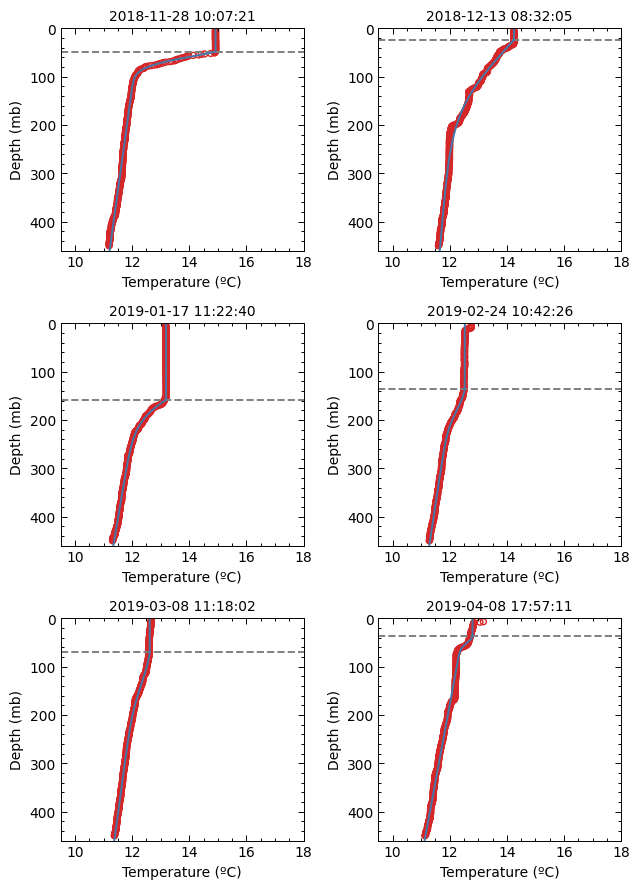

In [5]:
plot_multiple_profiles(df_fit, temp, pres, range(6))

In [6]:
print(df_fit[['Dates', 'b3']])

                Dates        b3
0 2018-11-28 10:07:21 -0.002332
1 2018-12-13 08:32:05 -0.001458
2 2019-01-17 11:22:40 -0.002866
3 2019-02-24 10:42:26 -0.002584
4 2019-03-08 11:18:02 -0.002281
5 2019-04-08 17:57:11 -0.003133
